# Machine Learning-Based Approach for Solar Energy Load Forecasting & Monitoring


## Problem Definition:
Predict solar power generated using Machine Learning algorithms. We will extract data for one site YMCA.

## Project Outline:
* Solar Power Prediction using weather and solar power dataset 

## Dataset: 
The dataset contains weather and power data  from domestic premises with high uptake of solar photvoltaic(PV) embeded generation. Data collected as part of the project run by UK power networks. 
We
This dataset contains  , but we will use the following 18 features in our analysis :

1. TempOut    Outdoor Temperature 
2. OutHum     Outdoor Humidity 
3. DewPt      Dew  Point 
4. WindSpeed  Wind Speed ( average wind speed) 
5. WindRun    Wind Run is the measurement amount of wind passing the station during a given period of time
6. HiSpeed    High Wind Speed 
7. WindChill  Wind Chill 
8. HeatIndex Heat Index : uses the temperature and the relative humidity  
9. THWIndex  Temperature Humidity Wind THW Index  uses humidity temperature the colling effects of wind
10. Rain      Rainfall
11. RainRate  High Rain Rate 
12. SolarRad  Solar Raditation
13. SolarEnergy Solar Energy 

15. HeatD-D    Heating Degree Days 
16. CoolD-D    Cooling Degree Days

17. P_GEN Power Generated Prediction 



## Model Evaluation Proposal:



## Packages Installation:
Uncomment the following line and paste it in to a codebox:

all done via pip
* #!pip install yellowbrick
* #!pip install seaborn
* #!pip install scipy
* #!pip install grafanalib

## Import Libraries 
Import  some of the required libraries.

In [119]:
# Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display   
%matplotlib inline
pd.reset_option('precision')
np.set_printoptions(precision=2)
np.printoptions(precision=2, suppress=True, threshold=5)
#Suppressing warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer

In [2]:
# Seaborn Styling 
sns.set(
    font_scale=1.5,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
)

## Load the Solar- Weather Dataset 

In [25]:
# Read the data
solarweather = pd.read_csv('dataset/solar-weather.csv')

## Summarize the Data

In [26]:
# Check the data - sample the data
solarweather.head()

,TempOut,OutHum,DewPt,WindSpeed,WindRun,HiSpeed,WindChill,HeatIndex,THWIndex,Rain,RainRate,SolarRad,SolarEnergy,HiSolarRad,HeatD-D,CoolD-D,P_GEN
0,10.6,84,8.0,5,2.5,14,9.7,10.6,9.7,0.0,0,32,1.38,44,0.162,0.0,-0.005
1,10.7,83,7.9,6,3.0,15,9.5,10.7,9.5,0.0,0,20,0.86,26,0.160,0.0,-0.005
2,10.7,81,7.6,6,3.0,18,9.6,10.7,9.5,0.0,0,22,0.95,32,0.159,0.0,-0.005
3,10.4,82,7.4,5,2.5,14,9.4,10.4,9.4,0.0,0,8,0.34,14,0.166,0.0,-0.005
4,10.3,84,7.7,5,2.5,15,9.3,10.3,9.3,0.0,0,0,0.00,0,0.168,0.0,-0.005


We can see there are different scales on the data

In [5]:
solarweather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15697 entries, 0 to 15696
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TempOut      15697 non-null  float64
 1   OutHum       15697 non-null  int64  
 2   DewPt        15697 non-null  float64
 3   WindSpeed    15697 non-null  int64  
 4   WindRun      15697 non-null  float64
 5   HiSpeed      15697 non-null  int64  
 6   WindChill    15697 non-null  float64
 7   HeatIndex    15697 non-null  float64
 8   THWIndex     15697 non-null  float64
 9   Rain         15697 non-null  float64
 10  RainRate     15697 non-null  int64  
 11  SolarRad     15697 non-null  int64  
 12  SolarEnergy  15697 non-null  float64
 13  HiSolarRad   15697 non-null  int64  
 14  HeatD-D      15697 non-null  float64
 15  CoolD-D      15697 non-null  float64
 16  P_GEN        7612 non-null   float64
dtypes: float64(11), int64(6)
memory usage: 2.0 MB


## Understanding the Data
We will start by using Descriptive Statistics in Data Exploration. This is used to so we can  take a closer look at our loaded data.
### Descriprtive statistics
Let’s summarize the distribution of each attribute.

In [6]:
solarweather.describe().T

,count,mean,std,min,25%,50%,75%,max
TempOut,15697.0,12.386163,5.235313,-1.800,8.300,12.400,16.00000,30.900
OutHum,15697.0,81.483532,13.493448,34.000,74.000,86.000,92.00000,98.000
DewPt,15697.0,9.029101,4.170129,-2.500,5.800,9.200,12.20000,20.200
WindSpeed,15697.0,1.625406,2.053586,0.000,0.000,1.000,3.00000,15.000
WindRun,15697.0,0.812703,1.026793,0.000,0.000,0.500,1.50000,7.500
HiSpeed,15697.0,6.132828,5.132731,0.000,2.000,5.000,9.00000,34.000
WindChill,15697.0,12.186188,5.434067,-1.800,7.900,12.300,16.00000,30.900
HeatIndex,15697.0,12.346480,5.238430,-1.800,8.300,12.300,15.80000,31.200
THWIndex,15697.0,12.146366,5.437551,-1.800,8.000,12.200,15.80000,31.200
Rain,15697.0,0.000016,0.001995,0.000,0.000,0.000,0.00000,0.250


Now, let’s now take a look at the correlation between all of the numeric attributes.

In [7]:
solarweather.corr(method='pearson')

,TempOut,OutHum,DewPt,WindSpeed,WindRun,HiSpeed,WindChill,HeatIndex,THWIndex,Rain,RainRate,SolarRad,SolarEnergy,HiSolarRad,HeatD-D,CoolD-D,P_GEN
TempOut,1.000000,-0.578607,0.832486,-0.118427,-0.118427,-0.021726,0.995601,0.997956,0.993629,-0.001504,NaN,0.528405,0.528404,0.529842,-0.975152,0.589240,-0.033524
OutHum,-0.578607,1.000000,-0.034969,-0.121618,-0.121618,-0.239208,-0.567444,-0.534510,-0.524941,0.002672,NaN,-0.683802,-0.683801,-0.683741,0.525456,-0.482564,0.017168
DewPt,0.832486,-0.034969,1.000000,-0.222085,-0.222085,-0.180021,0.834242,0.860147,0.860894,0.000136,NaN,0.173609,0.173609,0.180301,-0.845923,0.366096,-0.031545
WindSpeed,-0.118427,-0.121618,-0.222085,1.000000,1.000000,0.908738,-0.192636,-0.129367,-0.203170,-0.002431,NaN,0.089533,0.089532,0.101583,0.122783,-0.043247,-0.070123
WindRun,-0.118427,-0.121618,-0.222085,1.000000,1.000000,0.908738,-0.192636,-0.129367,-0.203170,-0.002431,NaN,0.089533,0.089532,0.101583,0.122783,-0.043247,-0.070123
HiSpeed,-0.021726,-0.239208,-0.180021,0.908738,0.908738,1.000000,-0.087162,-0.036729,-0.101640,-0.003317,NaN,0.189788,0.189788,0.212539,0.030576,0.021387,-0.060280
WindChill,0.995601,-0.567444,0.834242,-0.192636,-0.192636,-0.087162,1.000000,0.993643,0.998102,-0.001155,NaN,0.521087,0.521087,0.521930,-0.973159,0.578313,-0.020788
HeatIndex,0.997956,-0.534510,0.860147,-0.129367,-0.129367,-0.036729,0.993643,1.000000,0.995600,-0.001442,NaN,0.504594,0.504594,0.506022,-0.970943,0.596239,-0.035528
THWIndex,0.993629,-0.524941,0.860894,-0.203170,-0.203170,-0.101640,0.998102,0.995600,1.000000,-0.001096,NaN,0.498173,0.498172,0.499021,-0.969101,0.585030,-0.022288
Rain,-0.001504,0.002672,0.000136,-0.002431,-0.002431,-0.003317,-0.001155,-0.001442,-0.001096,1.000000,NaN,0.001263,0.001262,0.001944,0.001123,-0.002304,NaN


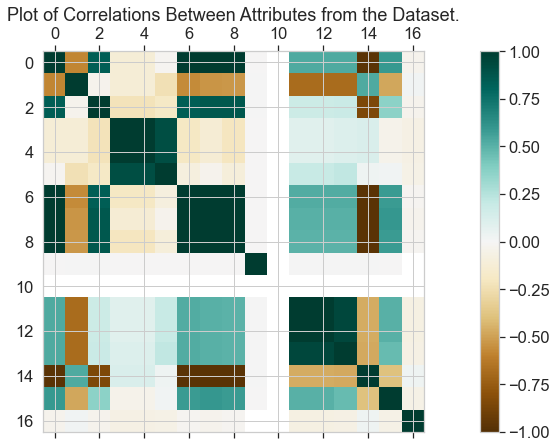

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(solarweather.corr(), vmin=-1, vmax=1, cmap='BrBG',interpolation='none')
fig.colorbar(cax)
ax.set_title('Plot of Correlations Between Attributes from the Dataset.')
plt.show()

Its looks like manny more attributes are correlated to each other.The dark brown  colors around the bottom right diagnoal show more correlation while the white to green show some moderate negative correlation in different  areas. Seaborn has a better implementation of heat maps to show data correlation which can be done as follows:

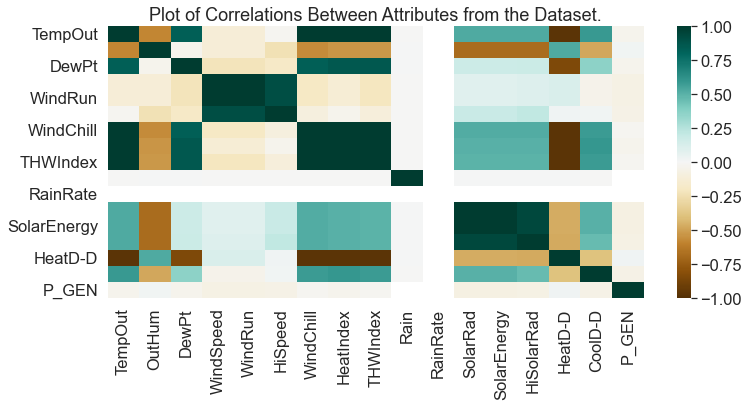

In [9]:
fig, ax = plt.subplots(1, figsize=(12, 5))
sns.heatmap(solarweather.corr() ,  vmin=-1, vmax=1, cmap='BrBG' , ax=ax)
ax.set_title('Plot of Correlations Between Attributes from the Dataset.')
plt.show()

#### Skewness and Kurtosis
* Skew refers to the distribution  that assumed to be gaussian  that is shifted in one direction or another.  It allows you to improve the accuracy of your model and better data preparation. Skewness is a measure of the symmetry of a distribution.
* Kurtosis determines the heaviness of the distribution tails.

In [10]:
solarweather.kurt()

TempOut           -0.284817
OutHum             0.185801
DewPt             -0.723077
WindSpeed          2.354823
WindRun            2.354823
HiSpeed            1.174444
WindChill         -0.408738
HeatIndex         -0.180584
THWIndex          -0.314782
Rain           15697.000000
RainRate           0.000000
SolarRad           3.762922
SolarEnergy        3.763023
HiSolarRad         2.139162
HeatD-D           -0.835324
CoolD-D           21.958279
P_GEN              1.382207
dtype: float64

## Statistical Analysis Visualization

### Uni-variate Analysis
The goal is to select those features that have the strongest relationship with the output variable in addition to understand the distribution of the attributes.It allows you to describe patterns and get an idea of the distribution found in univariate data include.

####  Univariate Data Plots
We can see from the histogram chart the following attribiutes have Gaussian Distribution
Outisde Temperature , Outside Humidity and Dew Pt

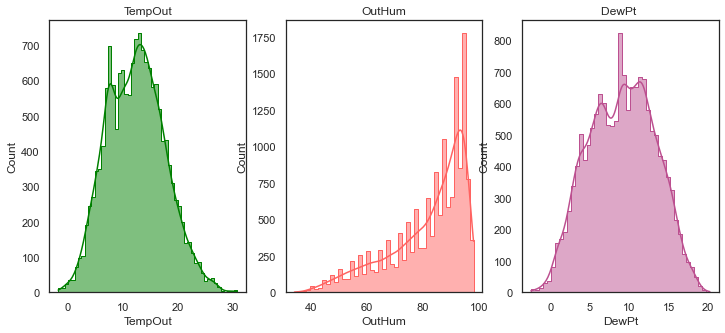

In [11]:
# Histograms - Numerical Group Stats Visualization
sns.set(style="white")
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
sns.histplot(solarweather.TempOut,  element="step",color="green", kde=True, ax=axs[ 0] ).set_title("TempOut")
sns.histplot(solarweather.OutHum,  element="step", color="#ff6361",kde=True, ax=axs[ 1]).set_title("OutHum")
sns.histplot(solarweather.DewPt ,  element="step",color="#bc5090", kde=True,ax=axs[2 ] ).set_title("DewPt ")

plt.show()

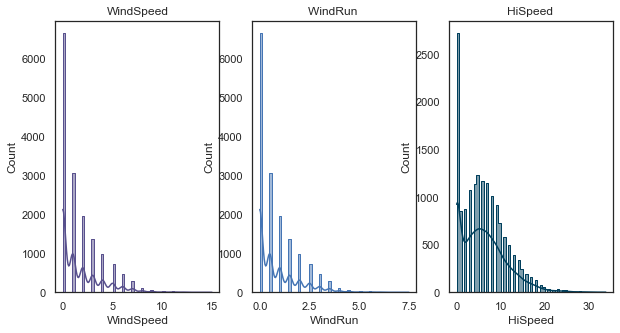

In [15]:
# Numerical Group Stats visualization
sns.set(style="white")
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
sns.histplot(solarweather.WindSpeed,  element="step",color="#58508d", kde=True, ax=axs[0] ).set_title("WindSpeed")
sns.histplot(solarweather.WindRun ,  element="step",color="#4575b4",kde=True, ax=axs[1]).set_title("WindRun ")
sns.histplot(solarweather.HiSpeed ,  element="step",color="#003f5c", kde=True,ax=axs[2] ).set_title("HiSpeed ")
plt.show()

scatter plots for boolean values doesnt allow us to infer that much because blue dots could bhind the orange dots or vise versa 

### Multi-variate Analysis

We look at heatmap based on our partition models to look closely in to the correlation between group with the similar types.

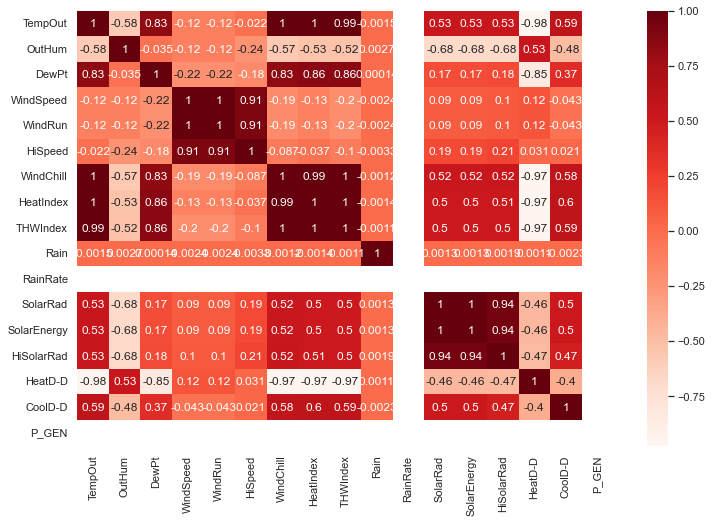

In [120]:
fig, ax = plt.subplots(1,  figsize=(12, 8))
sns.heatmap(solarweather.corr(), annot=True, cmap=plt.cm.Reds, ax=ax)
plt.show()

This is useful, you can see that some of the attributes have a skewed distribution.But using pairplot for our partition model has advantages and disadvantages. The pros can be listed as visualization is not cluttered , easier to read and udnerstand  while the cons can be we missing the correlation between different attributes just because they are not on the same group.
## Data Scaling

Data is comprised of attributes  with varying scales. Its useful for optimizing your algorithms. We will apply standard scalers on the gaussian features and apply normalization on the non gaussian features. 
### Standard Scaler

Apply standard scaler  

In [ ]:
solar_data = solarweather[['','']]
names = ['','','','','','','','','','']
arrayg = solar_data.values
# seperate in to input and output components 
Xg = arrayg[:,0:8]
print(Xg)
Yg = arrayg[:,9]
print(Yg)

scaler = StandardScaler().fit(Xg)
rescaledXg = scaler.transform(Xg)
print(rescaledXg)




In [ ]:
# summarize transfiormed data
print(names)
print(rescaledXg[0:4,:])

####  Feature Selection  After Applying Scaling 

In [ ]:
from yellowbrick.features import Rank1D
# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
feature_names1 = [ 'fbs','trestbps', 'chol', 'thalach', 'oldpeak', 'ca','cp','exang', 'sex','slope']
target_name1 = ['target']

XX1 = heartdata[feature_names1]
YY1 = heartdata[target_name1]

visualizer = Rank1D(features=feature_names1,algorithm='shapiro')
visualizer.fit(XX1, YY1)           
visualizer.transform(XX1)        
visualizer.show() 

In [ ]:
from yellowbrick.features import Rank2D
visualizer = Rank2D(features=feature_names1,algorithm='pearson')
visualizer.fit(XX1, YY1)           
visualizer.transform(XX1)        
visualizer.show() 